<a href="https://colab.research.google.com/github/hank199599/data_science_from_scratch_reading_log/blob/main/Chapter8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

進行這專案前，需要引用第四章的向量定義以及相關運算來進行初始化

In [23]:
from typing import List
import math

Vector = List[float]

def subtrate( v:Vector, w:Vector) -> Vector:
  assert len(v) == len(w) #兩個向量必須有相同的維度

  return [ v_i-w_i for v_i,w_i in zip(v,w)]

def dot(v:Vector,w:Vector)->float:
  #計算v_1*w_1+... +v_n*w_n
  assert len(v)==len(w),"兩個向量必須有相同的維度"

  return sum(v_i*w_i for v_i,w_i in zip(v,w))

def sum_of_squares(v:Vector) -> float:
  return dot(v,v)

def squared_distance(v:Vector,w:Vector) -> float:
  return sum_of_squares(subtrate(v,w))

def distance(v:Vector,w:Vector) -> float:
  return math.sqrt(squared_distance(v,w))

def add( v:Vector, w:Vector) -> Vector:
  assert len(v) == len(w) ,"兩個向量必須有相同的維度"

  return [ v_i+w_i for v_i,w_i in zip(v,w)]

def scalar_multiply(c:float,v:Vector) -> Vector:
  return [c*v_i for v_i in v]

# 梯度遞減(gradient descent)
用於找出某個輸入值v，使函數得出的最大值(或最小值)的可能值

In [ ]:
def sum_of_square(v:Vector)->float:
  """計算v之中的平方和"""
  return dot(v,v)

## 梯度(*gradient*)：向量的偏導數
  
欲求出函數的**最大值**：
1. 取個隨機的起始點
2. 計算其梯度
3. 沿著梯度方向(即函數增長最多的方向)移動一小步

欲求出函數的**最小值**： 
1. 取個隨機的起始點
2. 計算其梯度
3. 沿著梯度**反方向**移動一小步

### 圖8-1  利用梯度遞減的概念，來找出最小值
![pic 8-1](https://lh3.googleusercontent.com/25UnUOO0nEydtbTOO2oImdEs9gcZCRAV605Rcyj3sq7R1sJvhiAbrXCU4NOAmk7e2Fy13nqZr_sUtttgzGKjWukxsSyTtjXdPcERR-fQNODiKqjJJEzJkyDhweAINiXpE5DSI9u9pOIsctPLXFkum9tWDjil3td9ZuhrXAtQUzjXI6urrOARRVK0RTcve7QzKqKrkXUVESGc09MEX5aZ-WQzbClFJUInfZcyAF6p5AZd6RXw2f5-PfQ5d_LVAA97lukdnup3ZmvR5NaSBbBsoe40F8vPe3RdukmBAd-QfhluROmTQ38S5CKazKeINvzg91naEWsiKo_0AVuyS9PZVLg2kLEf7qGmyH5bo0vi__kwA3Jgu4MNw50PGJjOFWkVVVB9MVWbiUmMXoOebxLPkgFnIWRprkvMkj1dMc1HjB3A2TBT5fFS-3A3MzPOJ4DoVY8B939t5zkUAbBSpA83h8oFeepa2jwKahH-GavgLsmuq_U8OB0-n9TlfEMSgxFbJS01uyQ5_epjH12olp7prDN9vowxAHyW62GqdTK5HJDVQEa2ZdYK26pooJFUibhwf88ub7qsn-z3mrM1y4qro-087Drt97_AcctWW7uccCoEePXB3fpzKgIfkxztD4MGnsDaYfucJOTKD3I5UK3o7L8rMCIlMPuT_mxsi6Au618iDwYmEZMv7IszQ8LdUQ=w762-h559-no?authuser=0)
  
如果函數只有一個局域最小值，則我們能輕易找到這個值，但如果函數有好幾個極小值,就有可能找錯點。  
如果函數根本沒有最小值，則會陷入無限迴圈。

# 梯度的估算

如果f函數只有一個變數  
在點X所謂的導數(derivative)就是衡量x出現微小變化時f(x)跟著變化的程度。

導數可以定義為商差(difference quotient)的極限：  
其中h趨近於0

In [8]:
from typing import Callable

def difference_quotient(f:Callable[[float],float],x:float,h:float)->float:
  return (f(x+h)-f(x))/h

### 圖8-2 利用商差的定義來趨近導數的定義
導數就是(x,f(x))這個點的切線斜率，  
而商差則是穿越(x,f(x))和(x+h,f(x+h))這兩點的割線斜率。  
隨著h趨近於0，割線與切線會越來越近。
  
![pic 8-2](https://lh3.googleusercontent.com/rbCDonyegkqDkirKhNAsGChU0Gd4LjZKC8BkG1intRmjxE0SPr0OG_25WBOS7hfW5vWvgIVkFN7VoYZN4jifGkobb7ycEhyPzSrXWjv1eGEZroC8c5PM5tMB_YO-7z7t2VnIymYTKClJAzSsLfe7hpgmIXVNSNIWi7YARrr34BiMQYrOBQzE5xUM-ZaN-sm9D5zOsiSSAsXvXO6JMknT6jlPrvUK-9LmbTFH6b5zMSv9hwpFbF-fE18Hyr6-Y9XqTa09ZVkzbrwkd_31VQLhovJZAA5uOcGJHnSfG_66HWXPhWQBXKcbBb143uCANyzIscyR5eAYBtoORlnlWchL3p0FeQ2QWebutOMQ0_VaOh1xbIjbfV7Mx17EeFQRGNv0gYhRwMM7RZRlsfSJbq_MVhTiLr0uASpqOq7Kk2ponK0MBvBVPK93Gh3hUcgu-CQj8toy3Xo9qBfqedxLzPy_0Yl0ZfHkA7dLXqUJNvdJU0T2q1s1lmcSP66t-bTid3GZtnSVqNi7jO3N3TPgW74AA1zepO5SbIo-6uzz7lK1_nk9StqWg2j1z0ovIezAQVieVGjB9TBOMct-RiCN31oLp5I0dIvN6KUQA0IxwUan9s0xuKmcc7ZmioHJQqfw3PYNqsAc1fmUz7a-dJ-iDp67b4AZa-ADVWXQgVD6ic1ymwjo-mcl08f3iMNPLGcIWQ=w971-h708-no?authuser=0)

## 範例：平方函數

In [4]:
#平方函數
def square(x:float)->float:
  return x*x

In [3]:
#平方函數的導數
def devivative(x:float)->float:
  return 2*x

### 圖8-3 利用商差獲取導數的結果

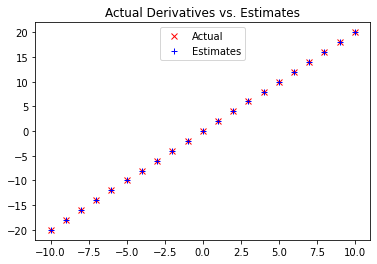

In [13]:
xs = range(-10,11)
actuals =[devivative(x) for x in xs]
estimates = [difference_quotient(square,x,h=0.001) for x in xs]

#畫出圖形來比較兩者
import matplotlib.pyplot as plt
plt.title("Actual Derivatives vs. Estimates")
plt.plot(xs, actuals ,'rx',label='Actual')    #用紅色x表示
plt.plot(xs, estimates ,'b+',label='Estimates') #用藍色+表示
plt.legend(loc=9)
plt.show()

## 偏導數
如果f是個多變數函數，就會有多個偏導數

In [ ]:
def partitial_difference_quotient(f:Callable[[float],float],v:Vector,i:int,h:float) ->float:
  """送回f在v中第i個元素所對應的差商"""
  w = [v_j + (h if i else 0) for i in range(len(v))]
  return (f(w)-f(v))/ h

### 利用商差估計梯度
缺點是對於計算能力要求很高，  
若v有n個元素，則會進行2n個運算

In [ ]:
def estimate_gradient(f:Callable[[float],float],v:Vector,h:float = 0.0001):
  return [partial_difference_quotient(f,v,i,h) for i in range(len(v))]

# 梯度的應用

透過梯度遞減，在眾多三維向量中試著求出最小值。  
1. 以隨機方式挑出一個起始點
2. 沿著梯度的反方向移動一小步
3. 重複動作1.2.直到梯度變得非常小為止

In [25]:
import random

def gradient_step(v:Vector,gradient:Vector,step_size:float) -> Vector:
  """從v沿著gradient的方向移動step_size的距離"""
  assert len(v) == len(gradient)
  step = scalar_multiply(step_size,gradient)
  return add(v,step)

def sum_of_squares_gradient(v:Vector) -> Vector:
  return [2*v_i for v_i in v]

#取個隨機起點
v = [random.uniform(-10,10) for i in range(3)]

for epoch in range(1000):
  grad = sum_of_squares_gradient(v) # 計算出v所對應的梯度
  v = gradient_step(v,grad,-0.01)  # 往梯度的負方向跨一小步
  print(epoch,v)

assert distance(v,[0,0,0]) < 0.001  # v應該會很接近0



0 [-9.568454864866709, 3.6061191205738945, 0.41162764583645983]
1 [-9.377085767569374, 3.5339967381624167, 0.40339509291973064]
2 [-9.189544052217986, 3.4633168033991684, 0.395327191061336]
3 [-9.005753171173627, 3.394050467331185, 0.3874206472401093]
4 [-8.825638107750153, 3.326169457984561, 0.3796722342953071]
5 [-8.64912534559515, 3.25964606882487, 0.372078789609401]
6 [-8.476142838683247, 3.1944531474483724, 0.364637213817213]
7 [-8.306619981909583, 3.130564084499405, 0.35734446954086874]
8 [-8.14048758227139, 3.0679528028094167, 0.35019758015005137]
9 [-7.977677830625963, 3.006593746753228, 0.3431936285470503]
10 [-7.818124274013443, 2.9464618718181637, 0.3363297559761093]
11 [-7.661761788533174, 2.8875326343818, 0.32960316085658714]
12 [-7.50852655276251, 2.8297819816941643, 0.3230110976394554]
13 [-7.35835602170726, 2.773186342060281, 0.3165508756866663]
14 [-7.211188901273115, 2.7177226152190754, 0.31021985817293296]
15 [-7.066965123247653, 2.663368162914694, 0.3040154610094743

隨著執行的階段越多，v就越靠近[0,0,0]

## 選擇正確的跨步間隔
* 使用固定的間隔
* 隨時間逐漸縮小間隔
* 每個步驟都重新能夠讓目標函數數值最小話的間隔

# 利用梯度遞減的做法來套入模型
運用梯度遞減的做法把參數化模型套入到資料中，這些模型通常具有一個或多個參數。這些可微分的參數負責維繫著模型與資料間的關係。並搭配一個**損失函數(loss function)**來衡量模型與資料的匹配程度。

In [ ]:
input=[(x,20*x+5) for x in range(-50,50)]